# Use svmbir for shepp logan phantom reconstruction.
This example demonstrates the generation of a Shepp-Logan phantom followed by sinogram projection and reconstruction using MBIR. 
The phantom, sinogram, and reconstruction are then displayed. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import svmbir

In [2]:
def plot_result(img, title=None, vmin=None, vmax=None):
    """
    Function to display and save a 2D array as an image.
    :param img: 2D numpy array to display
    :param title: Title to display
    :param vmin: Value mapped to black
    :param vmax: Value mapped to white
    """

    fig = plt.figure()
    imgplot = plt.imshow(img, vmin=vmin, vmax=vmax)
    plt.title(label=title)
    imgplot.set_cmap('gray')
    plt.colorbar()
    plt.show()
    plt.close()

#  Parameters

In [3]:
# Simulated image parameters
num_rows = 256
num_cols = num_rows

# Simulated sinogram parameters
num_views = 144

# Reconstruction parameters
T = 0.1
p = 1.1
sharpness = 2.0
snr_db = 40.0

# Generate array of view angles form -180 to 180 degs
angles = np.linspace(-np.pi/2.0, np.pi/2.0, num_views, endpoint=False)

# Generate phantom with a single slice

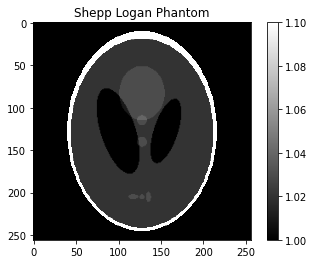

In [4]:
phantom = svmbir.phantom.gen_shepp_logan(num_rows,num_cols)

plot_result(phantom, title='Shepp Logan Phantom',vmin=1., vmax=1.1)

phantom = np.expand_dims(phantom, axis=0)

# Generate sinogram by projecting phantom

Found system matrix: /Users/damonli/.cache/svmbir/parbeam/sysmatrix/abd33f36e770cb3ed8e9.2Dsvmatrix


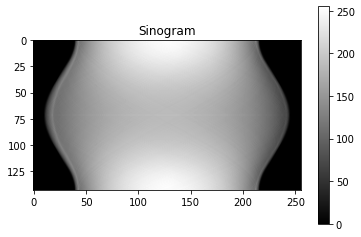

In [5]:
sino = svmbir.project(angles, phantom, max(num_rows, num_cols))
plot_result(np.squeeze(sino), title='Sinogram')

# MBIR reconstruction

Found system matrix: /Users/damonli/.cache/svmbir/parbeam/sysmatrix/abd33f36e770cb3ed8e9.2Dsvmatrix


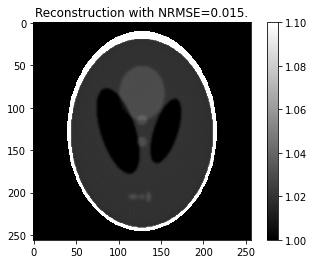

In [6]:
# Determine resulting number of views, slices, and channels
(num_views, num_slices, num_channels) = sino.shape

# Perform MBIR reconstruction
recon = svmbir.recon(sino, angles, num_rows=num_rows, num_cols=num_cols, T=T, p=p, sharpness=sharpness, snr_db=snr_db)

# Compute Normalized Root Mean Squared Error
nrmse = svmbir.phantom.nrmse(recon[0], phantom[0])

# display reconstruction
title = f'Reconstruction with NRMSE={nrmse:.3f}.'
plot_result(recon[0], title=title, vmin=1.0, vmax=1.1)